In [8]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
###from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [58]:
location = r"E:\Python\Machine Learning\datasets\temps.csv"

In [59]:
# Following are explanations of the columns:

# year     : 2016 for all data points
# month    : number for month of the year
# day      : number for day of the year
# week     : day of the week as a character string
# temp_2   : max temperature 2 days prior
# temp_1   : max temperature 1 day prior
# average  : historical average max temperature
# actual   : max temperature measurement
# friend   : your friend’s prediction, a random number between 20 below the 
#            average and 20 above the average

# there are nine columns which represent eight features and the 
# one target (‘actual’).

In [60]:
# load the training data 
df_train = pd.read_csv(location )
df_train.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [61]:
df_train.shape

(348, 12)

In [62]:
# To identify anomalies, we can quickly compute summary statistics.

# Descriptive statistics for each column
df_train.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [63]:
df_train.dtypes

year                int64
month               int64
day                 int64
week               object
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
dtype: object

In [64]:
df_train.isna().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [66]:
# preprocessing
# One-Hot Encoding (dummy fying)

# One-hot encode the data using pandas get_dummies
df_train = pd.get_dummies(df_train, columns=["week"])
df_train.head(10)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
5,2016,1,6,40,44,46.1,51,43,49,48,40,0,0,0,0,0,0,1
6,2016,1,7,44,51,46.2,45,45,49,46,38,0,0,0,0,1,0,0
7,2016,1,8,51,45,46.3,48,43,47,46,34,1,0,0,0,0,0,0
8,2016,1,9,45,48,46.4,50,46,50,45,47,0,0,1,0,0,0,0
9,2016,1,10,48,50,46.5,52,45,48,48,49,0,0,0,1,0,0,0


In [67]:
y = df_train['actual']  

# Remove the labels from the features
# axis 1 refers to the columns
df_train= df_train.drop('actual', axis = 1)

feature_list = df_train.columns

X = df_train[feature_list] 

In [68]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [69]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (278, 17)
Training Labels Shape: (278,)
Testing Features Shape: (70, 17)
Testing Labels Shape: (70,)


In [70]:
X_test.shape

(70, 17)

In [71]:
# The baseline predictions are the historical averages
baseline_preds = X_test['average']
baseline_preds.head()

6      46.2
52     50.8
269    60.6
45     50.0
294    52.7
Name: average, dtype: float64

In [72]:
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
baseline_errors

6       1.2
52      8.2
269     0.6
45      7.0
294    18.3
       ... 
106    22.0
158     1.8
120    11.9
218     5.1
63      0.6
Length: 70, dtype: float64

In [73]:
X_train.shape

(278, 17)

In [74]:
# Instantiate model with 1000 decision trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, 
                           random_state = 42, oob_score= True)

In [75]:
# Train the model on training data
rf.fit(X_train, y_train);

In [47]:
# Make Predictions on the Test Set

In [76]:
rf.oob_score_

0.8304786286745965

In [77]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
print(predictions, y_test)

[49.308 57.52  63.015 53.66  61.83  75.475 74.479 62.991 63.174 68.818
 44.048 55.133 80.106 65.127 62.583 65.478 63.233 49.468 76.511 72.968
 68.314 60.642 54.198 61.851 75.513 51.533 51.816 68.933 58.861 76.692
 56.783 58.872 59.396 62.747 60.032 62.459 46.407 69.928 55.787 51.096
 61.523 73.545 61.96  78.517 85.768 59.723 61.84  62.096 73.985 61.731
 63.946 49.547 55.646 45.243 56.166 77.667 74.908 62.935 56.897 57.869
 72.459 72.214 56.474 62.058 65.373 77.715 66.549 78.971 75.969 60.698] 6      45
52     59
269    60
45     57
294    71
       ..
106    81
158    67
120    74
218    72
63     53
Name: actual, Length: 70, dtype: int64


In [78]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
print(errors)

6      4.308
52     1.480
269    3.015
45     3.340
294    9.170
       ...  
106    3.285
158    0.451
120    4.971
218    3.969
63     7.698
Name: actual, Length: 70, dtype: float64


In [79]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.75 degrees.


In [80]:
# Determine Performance Metrics

In [81]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
mape

6       9.573333
52      2.508475
269     5.025000
45      5.859649
294    12.915493
         ...    
106     4.055556
158     0.673134
120     6.717568
218     5.512500
63     14.524528
Name: actual, Length: 70, dtype: float64

In [82]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.99 %.


In [84]:
from sklearn.metrics import r2_score, adjusted_rand_score

In [88]:
R2 =r2_score( y_test, predictions )

In [103]:
X_test.shape

(70, 2)

In [105]:
n = 70
p = 17
adjR2 = 1 - ((1 - 80) * (n - 1))/(n-p-1)
adjR2

105.82692307692308

In [39]:
tree1 = rf.estimators_[500]

In [40]:
tree1

DecisionTreeRegressor(max_features='auto', random_state=1264648382)

In [26]:
# Visualizing a Single Decision Tree
!pip install graphviz

In [27]:
# Install windows package from: 
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# Install python graphviz package (pip install graphviz)
# Add ...\Graphviz2.38\bin to User path
# Add ...\Graphviz2.38\bin\dot.exe to System Path

In [28]:
import graphviz 
from sklearn.tree import export_graphviz

In [28]:
# Pull out one tree from the forest
tree = rf.estimators_[190]

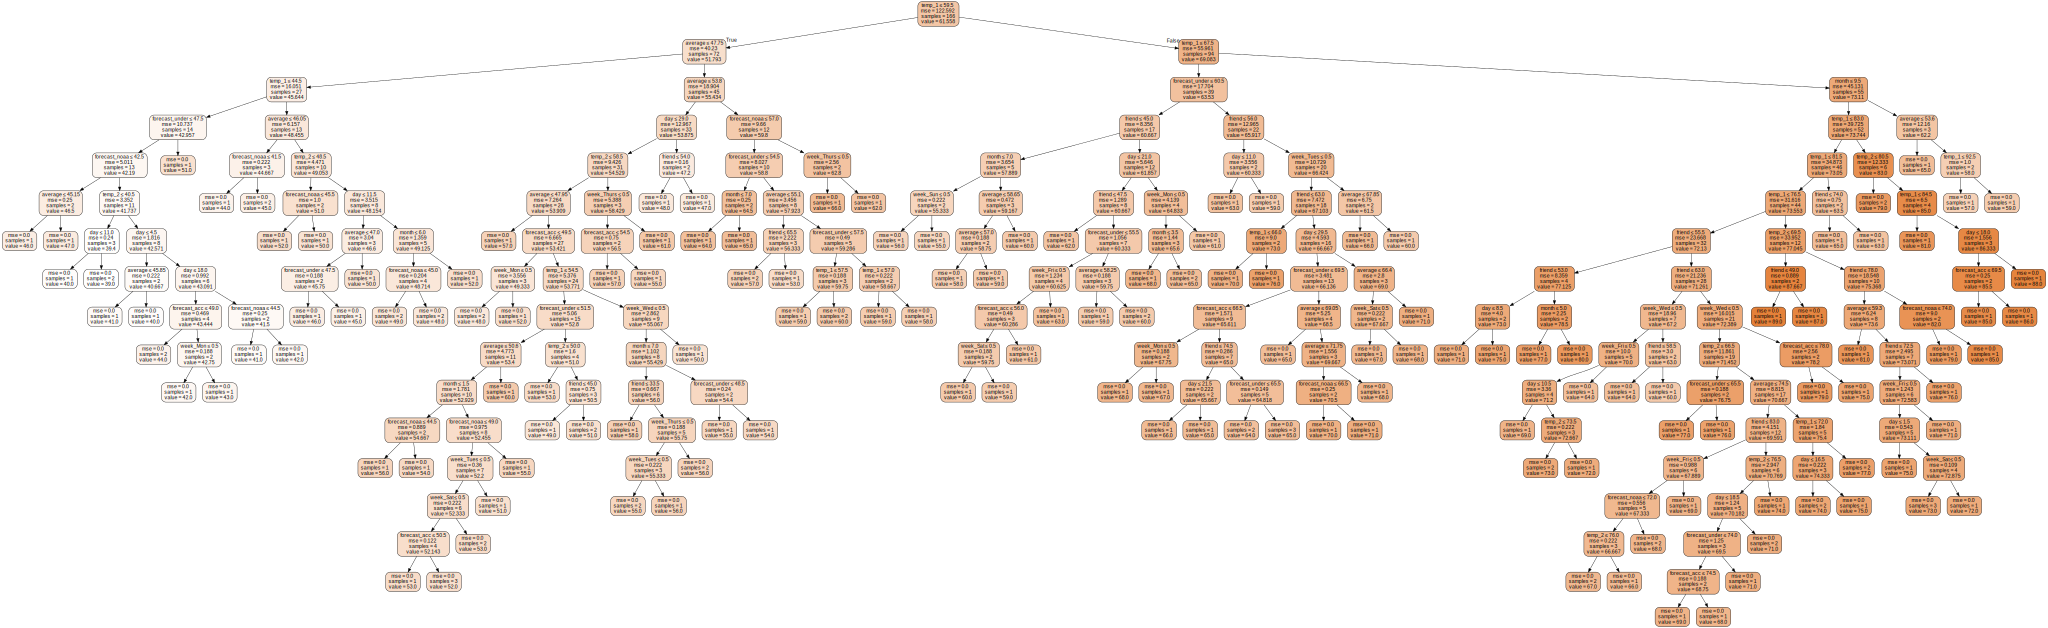

In [31]:
dot_data = export_graphviz(tree, 
                                out_file=None, 
                                feature_names=feature_list,  
                                #class_names=y.unique(),  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data)  

graph.render(r"E:\Python\Machine Learning\datasets\temps-tree") #
graph

In [37]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
importances

[0.0,
 0.009509779220468416,
 0.016743584485964625,
 0.018686539331716285,
 0.4564623733878114,
 0.3362607940412752,
 0.019000349698522136,
 0.09585080141806221,
 0.012742850497926454,
 0.01855435372678993,
 0.0019881391779182633,
 0.004384024816214159,
 0.0017777389530549627,
 0.0019079555765861224,
 0.0013631359336661914,
 0.0020509487699221355,
 0.002716630964101606]

In [38]:
sum(importances)

1.0000000000000002

In [41]:
#[(col,round(imp,2)) for col, imp in zip(feature_list,importances)]

In [32]:
# List of tuples with variable and importancere, importance in zip(feature_list, importances)]
# feature_importances
# feature_importances = [(feature, round(importance, 2)) for featu

In [29]:
feature_list

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'week_Fri', 'week_Mon',
       'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed'],
      dtype='object')

In [42]:
feature_importances = [(feature, round(importance, 2)) for 
                       feature, importance 
                       in zip(feature_list, importances)]
feature_importances

[('year', 0.0),
 ('month', 0.01),
 ('day', 0.02),
 ('temp_2', 0.02),
 ('temp_1', 0.46),
 ('average', 0.34),
 ('forecast_noaa', 0.02),
 ('forecast_acc', 0.1),
 ('forecast_under', 0.01),
 ('friend', 0.02),
 ('week_Fri', 0.0),
 ('week_Mon', 0.0),
 ('week_Sat', 0.0),
 ('week_Sun', 0.0),
 ('week_Thurs', 0.0),
 ('week_Tues', 0.0),
 ('week_Wed', 0.0)]

In [47]:
sorted(feature_importances, key = lambda x: x[1], reverse = True)

[('temp_1', 0.46),
 ('average', 0.34),
 ('forecast_acc', 0.1),
 ('day', 0.02),
 ('temp_2', 0.02),
 ('forecast_noaa', 0.02),
 ('friend', 0.02),
 ('month', 0.01),
 ('forecast_under', 0.01),
 ('year', 0.0),
 ('week_Fri', 0.0),
 ('week_Mon', 0.0),
 ('week_Sat', 0.0),
 ('week_Sun', 0.0),
 ('week_Thurs', 0.0),
 ('week_Tues', 0.0),
 ('week_Wed', 0.0)]

In [34]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, 
                             key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('temp_1', 0.46),
 ('average', 0.34),
 ('forecast_acc', 0.1),
 ('day', 0.02),
 ('temp_2', 0.02),
 ('forecast_noaa', 0.02),
 ('friend', 0.02),
 ('month', 0.01),
 ('forecast_under', 0.01),
 ('year', 0.0),
 ('week_Fri', 0.0),
 ('week_Mon', 0.0),
 ('week_Sat', 0.0),
 ('week_Sun', 0.0),
 ('week_Thurs', 0.0),
 ('week_Tues', 0.0),
 ('week_Wed', 0.0)]

In [35]:
# temp_1 - the max temperature of the day before. 
# This tells us the best predictor of the max temperature for a day is the max temperature of 
# the day before, a rather intuitive finding. 

# The second most important factor is the historical average max temperature, 
# also not that surprising. 

# Not so useful
#  - friend , 
#  - the day of the week, 
#  - the year, the month, 
#  - the temperature 2 days prior. 

# we can remove those variables that have no importance and the performance will not suffer. 
# Additionally, if we are using a different model, say a support vector machine, 
# we could use the random forest feature importances as a kind of "feature selection" method. 

# Let’s quickly make a random forest with only the two most important variables, 
# the max temperature 1 day prior and the historical average and see how the performance compares.

In [32]:
# New random forest with only the two most important features
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42, oob_score=True)

In [33]:
df_train.head()

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,46,46,46,41,0,0,0,0,0,1,0


In [91]:
# Extract the two most important features

X = df_train[['temp_1', 'average']]

feature_list = X.columns

In [35]:
print(X.shape)
print(y.shape)
print(feature_list)

(348, 2)
(348,)
Index(['temp_1', 'average'], dtype='object')


In [92]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [93]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (278, 2)
Training Labels Shape: (278,)
Testing Features Shape: (70, 2)
Testing Labels Shape: (70,)


In [94]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42, oob_score=True)

In [95]:
# Train the random forest
rf_most_important.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [43]:
# Make predictions and determine the error
predictions = rf_most_important.predict(X_test)

In [96]:
rf_most_important.oob_score_

0.8107313524474792

In [97]:
errors = abs(predictions - y_test)

In [99]:
R2 = r2_score(y_test,predictions)

0.8090458130613951

In [98]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2),
      'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.75 degrees.
Accuracy: 93.99 %.


In [47]:
# we actually do not need all the data we collected to make accurate 
# predictions! If we were to continue using this model, we could only 
# collect the two variables and achieve nearly the same performance. 

# Knowing how to find the right balance between performance and cost is 
# an essential skill for a DS/ML engineer and will ultimately 
# depend on the problem!

In [100]:
X_test.shape

(70, 2)

In [101]:
n = 70
p = 2
adjR2 = 1 - ((1 - R2) * (n - 1))/(n-p-1)

In [102]:
adjR2

0.8033456880781532